<font size="+5">#07. Why Neural Networks Deeply Learn a Mathematical Formula?</font>

- Book + Private Lessons [Here ↗](https://sotastica.com/reservar)
- Subscribe to my [Blog ↗](https://blog.pythonassembly.com/)
- Let's keep in touch on [LinkedIn ↗](www.linkedin.com/in/jsulopz) 😄

# Machine Learning, what does it mean?

> - The Machine Learns...
>
> But, **what does it learn?**

In [1]:
%%HTML
<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">Machine Learning, what does it mean? ⏯<br><br>· The machine learns...<br><br>Ha ha, not funny! 🤨 What does it learn?<br><br>· A mathematical equation. For example: <a href="https://t.co/sjtq9F2pq7">pic.twitter.com/sjtq9F2pq7</a></p>&mdash; Jesús López (@sotastica) <a href="https://twitter.com/sotastica/status/1449735653328031745?ref_src=twsrc%5Etfw">October 17, 2021</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

# How does the Machine Learn?

## In a Linear Regression

In [2]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/Ht3rYS-JilE" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

## In a Neural Network

In [3]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/IHZwWFHWa-w?start=329" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

A Practical Example → [Tesla Autopilot](https://www.tesla.com/AI)

An Example where It Fails → [Tesla Confuses Moon with Semaphore](https://twitter.com/Carnage4Life/status/1418920100086784000?s=20)

# Load the Data

> - Simply execute the following lines of code to load the data.
> - This dataset contains **statistics about Car Accidents** (columns)
> - In each one of **USA States** (rows)

https://www.kaggle.com/fivethirtyeight/fivethirtyeight-bad-drivers-dataset/

In [4]:
import seaborn as sns

df = sns.load_dataset(name='car_crashes', index_col='abbrev')
df.sample(5)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
abbrev,,,,,,,
VA,12.7,2.413,3.429,11.049,11.176,768.95,153.72
WV,23.8,8.092,6.664,23.086,20.706,992.61,152.56
CA,12.0,4.200,3.360,10.920,10.680,878.41,165.63
ND,23.9,5.497,10.038,23.661,20.554,688.75,109.72
MI,14.1,3.384,3.948,13.395,10.857,1110.61,152.26


# Neural Network Concepts in Python

## Initializing the `Weights`

### How to `kernel_initializer` the weights?

$$
accidents = speeding \cdot w_1 + alcohol \cdot w_2 \ + ... + \ ins\_losses \cdot w_7
$$

In [6]:
algo.fit()

NameError: name 'algo' is not defined

`algo = ?`

In [17]:
from keras import Sequential, Input
from keras.layers import Dense

In [18]:
df.shape

(51, 7)

In [9]:
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense

In [20]:
df.shape

(51, 7)

In [21]:
model = Sequential()
model.add(layer=Input(shape=(6,)))
model.add(layer=Dense(units=3, kernel_initializer='zeros'))
model.add(layer=Dense(units=1))

### Make a Prediction with the Neural Network

> - Can we make a prediction for for `Washington DC` accidents
> - With the already initialized Mathematical Equation?

In [22]:
X = df.drop(columns='total')
y = df.total

In [23]:
AL = X[:1]

In [24]:
AL

,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
abbrev,,,,,,
AL,7.332,5.64,18.048,15.04,784.55,145.08


In [26]:
model.predict(AL)

array([[0.]], dtype=float32)

In [27]:
model.get_weights()

[array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[-0.12113643],
        [-0.7264997 ],
        [-0.8376943 ]], dtype=float32),
 array([0.], dtype=float32)]

### Predictions vs Reality

> 1. Calculate the Predicted Accidents and
> 2. Compare it with the Real Total Accidents

In [28]:
y_pred = model.predict(X)

In [29]:
dfres = df[['total']].copy()
dfres['pred_zeros'] = y_pred
dfres.head()

,total,pred_zeros
abbrev,,
AL,18.8,0.0
AK,18.1,0.0
AZ,18.6,0.0
AR,22.4,0.0
CA,12.0,0.0


In [30]:
mse = ((dfres.total - dfres.pred_zeros)**2).mean()
mse

265.9880392156863

### How to `kernel_initializer` the weights to 1?

In [31]:
model = Sequential()
model.add(layer=Input(shape=(6,)))
model.add(layer=Dense(units=3, kernel_initializer='ones'))
model.add(layer=Dense(units=1))

### Make a Prediction with the Neural Network

> - Can we make a prediction for for `Washington DC` accidents
> - With the already initialized Mathematical Equation?

In [32]:
X = df.drop(columns='total')
y = df.total

In [33]:
AL = X[:1]

In [34]:
AL

,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
abbrev,,,,,,
AL,7.332,5.64,18.048,15.04,784.55,145.08


In [35]:
model.predict(AL)

2021-11-15 12:00:31.417442: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[627.4761]], dtype=float32)

In [36]:
model.get_weights()

[array([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[-0.82789993],
        [ 0.53020895],
        [ 0.940801  ]], dtype=float32),
 array([0.], dtype=float32)]

### Predictions vs Reality

> 1. Calculate the Predicted Accidents and
> 2. Compare it with the Real Total Accidents

In [37]:
y_pred = model.predict(X)

In [38]:
dfres = df[['total']].copy()
dfres['pred_zeros'] = y_pred
dfres.head()

,total,pred_zeros
abbrev,,
AL,18.8,627.476074
AK,18.1,792.735962
AZ,18.6,678.492615
AR,22.4,657.208313
CA,12.0,690.185608


In [39]:
mse = ((dfres.total - dfres.pred_zeros)**2).mean()
mse

457800.5573237031

### How to `kernel_initializer` the weights to `glorot_uniform` (default)?

In [40]:
model = Sequential()
model.add(layer=Input(shape=(6,)))
model.add(layer=Dense(units=3, kernel_initializer='glorot_uniform'))
model.add(layer=Dense(units=1))

### Make a Prediction with the Neural Network

> - Can we make a prediction for for `Washington DC` accidents
> - With the already initialized Mathematical Equation?

In [41]:
X = df.drop(columns='total')
y = df.total

In [42]:
AL = X[:1]

In [43]:
AL

,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
abbrev,,,,,,
AL,7.332,5.64,18.048,15.04,784.55,145.08


In [44]:
model.predict(AL)

2021-11-15 12:00:53.488202: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[164.4096]], dtype=float32)

In [45]:
model.get_weights()

[array([[-0.515978  ,  0.29486084, -0.24545974],
        [-0.08075762, -0.4843331 , -0.55846286],
        [-0.5519333 ,  0.3534726 ,  0.6272007 ],
        [-0.22614557,  0.3294965 , -0.7274029 ],
        [-0.50146097,  0.25734174,  0.03941071],
        [ 0.7459314 , -0.79581195, -0.26785028]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[-0.33921838],
        [ 0.4942448 ],
        [-1.0911044 ]], dtype=float32),
 array([0.], dtype=float32)]

### Predictions vs Reality

> 1. Calculate the Predicted Accidents and
> 2. Compare it with the Real Total Accidents

In [46]:
y_pred = model.predict(X)

In [47]:
dfres = df[['total']].copy()
dfres['pred_zeros'] = y_pred
dfres.head()

,total,pred_zeros
abbrev,,
AL,18.8,164.409607
AK,18.1,238.960785
AZ,18.6,208.966797
AR,22.4,179.851746
CA,12.0,176.044510


In [48]:
mse = ((dfres.total - dfres.pred_zeros)**2).mean()
mse

32996.689520482854

## Play with the Activation Function

In [55]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/IHZwWFHWa-w?start=558" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

### Use `sigmoid` activation in last layer

In [56]:
model = Sequential()
model.add(layer=Input(shape=(6,)))
model.add(layer=Dense(units=3, kernel_initializer='glorot_uniform'))
model.add(layer=Dense(units=1, activation='sigmoid'))

In [57]:
model.compile(loss='mse', metrics=['mse'])

In [58]:
model.fit(X, y, epochs=500, verbose=0)

2021-11-14 22:28:07.667108: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


### Make a Prediction with the Neural Network

> - Can we make a prediction for for `Washington DC` accidents
> - With the already initialized Mathematical Equation?

In [59]:
X = df.drop(columns='total')
y = df.total

In [60]:
AL = X[:1]

In [61]:
AL

,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
abbrev,,,,,,
AL,7.332,5.64,18.048,15.04,784.55,145.08


In [64]:
model.predict(AL)

array([[1.]], dtype=float32)

In [65]:
model.get_weights()

[array([[ 0.5038092 ,  0.59251285, -0.61746967],
        [ 0.781296  , -0.80176395,  0.7765652 ],
        [-0.23051041,  0.07111514, -0.17885393],
        [ 0.77684414,  0.03942651,  0.7233834 ],
        [-0.0752281 , -0.2436133 , -0.75898665],
        [-0.7314203 ,  0.34452236,  0.56223965]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[ 0.66068447],
        [-1.1992097 ],
        [-1.0176677 ]], dtype=float32),
 array([0.], dtype=float32)]

### Predictions vs Reality

> 1. Calculate the Predicted Accidents and
> 2. Compare it with the Real Total Accidents

In [66]:
y_pred = model.predict(X)

In [67]:
dfres = df[['total']].copy()
dfres['pred_zeros'] = y_pred
dfres.head()

,total,pred_zeros
abbrev,,
AL,18.8,1.0
AK,18.1,1.0
AZ,18.6,1.0
AR,22.4,1.0
CA,12.0,1.0


In [68]:
mse = ((dfres.total - dfres.pred_zeros)**2).mean()
mse

235.4076470588235

### Use `linear` activation in last layer

In [49]:
model = Sequential()
model.add(layer=Input(shape=(6,)))
model.add(layer=Dense(units=3, kernel_initializer='glorot_uniform'))
model.add(layer=Dense(units=1, activation='linear'))

In [50]:
model.compile(loss='mse', metrics=['mse'])

In [51]:
model.fit(X, y, epochs=500, verbose=1)

Epoch 1/500


2021-11-15 12:01:40.857784: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 7ms/step - loss: 870.0609 - mse: 870.0609
Epoch 2/500
2/2 [==============================] - 0s 7ms/step - loss: 602.9550 - mse: 602.9550
Epoch 3/500
2/2 [==============================] - 0s 5ms/step - loss: 510.5091 - mse: 510.5091
Epoch 4/500
2/2 [==============================] - 0s 5ms/step - loss: 459.0305 - mse: 459.0305
Epoch 5/500
2/2 [==============================] - 0s 6ms/step - loss: 430.5728 - mse: 430.5728
Epoch 6/500
2/2 [==============================] - 0s 5ms/step - loss: 405.5358 - mse: 405.5358
Epoch 7/500
2/2 [==============================] - 0s 7ms/step - loss: 397.5556 - mse: 397.5556
Epoch 8/500
2/2 [==============================] - 0s 5ms/step - loss: 390.7502 - mse: 390.7502
Epoch 9/500
2/2 [==============================] - 0s 5ms/step - loss: 383.9734 - mse: 383.9734
Epoch 10/500
2/2 [==============================] - 0s 7ms/step - loss: 379.8975 - mse: 379.8975
Epoch 11/500
2/2 [==============================] -

### Make a Prediction with the Neural Network

> - Can we make a prediction for for `Washington DC` accidents
> - With the already initialized Mathematical Equation?

In [52]:
X = df.drop(columns='total')
y = df.total

In [53]:
AL = X[:1]

In [54]:
AL

,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
abbrev,,,,,,
AL,7.332,5.64,18.048,15.04,784.55,145.08


In [55]:
model.predict(AL)

2021-11-15 12:02:20.228034: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[20.347652]], dtype=float32)

In [56]:
model.get_weights()

[array([[-0.00474994, -0.64237976,  1.1920326 ],
        [-1.2127967 ,  0.4484758 ,  0.6197462 ],
        [-0.33858827, -0.87694556,  0.41806898],
        [-0.12903698, -0.16669346,  1.3946134 ],
        [-0.03923831,  0.09821993,  0.20969498],
        [ 0.1967846 , -0.4257857 , -0.05001729]], dtype=float32),
 array([-0.4092937 , -0.01713243,  0.40597132], dtype=float32),
 array([[-0.41592214],
        [-0.30333582],
        [ 0.05561225]], dtype=float32),
 array([0.41351485], dtype=float32)]

### Predictions vs Reality

> 1. Calculate the Predicted Accidents and
> 2. Compare it with the Real Total Accidents

In [57]:
y_pred = model.predict(X)

In [58]:
dfres = df[['total']].copy()
dfres['pred_zeros'] = y_pred
dfres.head()

,total,pred_zeros
abbrev,,
AL,18.8,20.347652
AK,18.1,18.540888
AZ,18.6,17.672066
AR,22.4,21.784229
CA,12.0,15.491752


In [59]:
mse = ((dfres.total - dfres.pred_zeros)**2).mean()
mse

3.8019322160465046

### Use `tanh` activation in last layer

In [80]:
model = Sequential()
model.add(layer=Input(shape=(6,)))
model.add(layer=Dense(units=3, kernel_initializer='glorot_uniform'))
model.add(layer=Dense(units=1, activation='tanh'))

In [81]:
model.compile(loss='mse', metrics=['mse'])

In [82]:
model.fit(X, y, epochs=500, verbose=0)

2021-11-14 22:28:29.829058: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


### Make a Prediction with the Neural Network

> - Can we make a prediction for for `Washington DC` accidents
> - With the already initialized Mathematical Equation?

In [83]:
X = df.drop(columns='total')
y = df.total

In [84]:
AL = X[:1]

In [85]:
AL

,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
abbrev,,,,,,
AL,7.332,5.64,18.048,15.04,784.55,145.08


In [86]:
model.predict(AL)

2021-11-14 22:28:33.915684: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[0.99999994]], dtype=float32)

In [87]:
model.get_weights()

[array([[-0.512019  , -1.0657645 ,  0.9369474 ],
        [-0.87672853, -0.54201865,  0.3476844 ],
        [-0.19562808, -1.6509485 ,  0.7531322 ],
        [-0.5743747 , -0.20604783,  1.8262724 ],
        [-1.5198137 , -1.412379  ,  0.6972853 ],
        [-0.70423585, -1.3741283 ,  1.6405212 ]], dtype=float32),
 array([-0.99589634, -0.9827833 ,  0.97375315], dtype=float32),
 array([[-2.1899748],
        [-1.4041648],
        [ 1.2513814]], dtype=float32),
 array([0.97996116], dtype=float32)]

### Predictions vs Reality

> 1. Calculate the Predicted Accidents and
> 2. Compare it with the Real Total Accidents

In [88]:
y_pred = model.predict(X)

In [89]:
dfres = df[['total']].copy()
dfres['pred_zeros'] = y_pred
dfres.head()

,total,pred_zeros
abbrev,,
AL,18.8,1.0
AK,18.1,1.0
AZ,18.6,1.0
AR,22.4,1.0
CA,12.0,1.0


In [90]:
mse = ((dfres.total - dfres.pred_zeros)**2).mean()
mse

235.4076488219523

### Use `relu` activation in last layer

In [91]:
model = Sequential()
model.add(layer=Input(shape=(6,)))
model.add(layer=Dense(units=3, kernel_initializer='glorot_uniform'))
model.add(layer=Dense(units=1, activation='relu'))

In [92]:
model.compile(loss='mse', metrics=['mse'])

In [93]:
model.fit(X, y, epochs=500, verbose=0)

2021-11-14 22:28:37.204348: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


### Make a Prediction with the Neural Network

> - Can we make a prediction for for `Washington DC` accidents
> - With the already initialized Mathematical Equation?

In [94]:
X = df.drop(columns='total')
y = df.total

In [95]:
AL = X[:1]

In [96]:
AL

,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
abbrev,,,,,,
AL,7.332,5.64,18.048,15.04,784.55,145.08


In [97]:
model.predict(AL)

2021-11-14 22:28:41.186601: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[0.]], dtype=float32)

In [98]:
model.get_weights()

[array([[-0.49556875, -0.6359177 , -0.7493128 ],
        [-0.49504453, -0.5848135 , -0.17635965],
        [ 0.7622068 , -0.3158698 , -0.5919111 ],
        [ 0.58445394,  0.02325135,  0.15200901],
        [ 0.01221597, -0.57732755,  0.5594759 ],
        [ 0.23276758, -0.1779086 , -0.44693196]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[-0.70902157],
        [ 0.25331163],
        [ 0.29283333]], dtype=float32),
 array([0.], dtype=float32)]

### Predictions vs Reality

> 1. Calculate the Predicted Accidents and
> 2. Compare it with the Real Total Accidents

In [99]:
y_pred = model.predict(X)

In [100]:
dfres = df[['total']].copy()
dfres['pred_zeros'] = y_pred
dfres.head()

,total,pred_zeros
abbrev,,
AL,18.8,0.0
AK,18.1,0.0
AZ,18.6,0.0
AR,22.4,0.0
CA,12.0,0.0


In [101]:
mse = ((dfres.total - dfres.pred_zeros)**2).mean()
mse

265.9880392156863

### How are the predictions changing? Why?

## Optimizer

Optimizers comparison in GIF → https://mlfromscratch.com/optimizers-explained/#adam

Tesla's Neural Network Models is composed of 48 models trainned in 70.000 hours of GPU → https://tesla.com/ai

1 Year with a 8 GPU Computer → https://twitter.com/thirdrowtesla/status/1252723358342377472

### Use Gradient Descent `sgd`

In [186]:
model = Sequential()
model.add(layer=Input(shape=(6,)))
model.add(layer=Dense(units=3, kernel_initializer='glorot_uniform'))
model.add(layer=Dense(units=1, activation='relu'))

In [187]:
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [188]:
model.fit(X, y, epochs=500, verbose=1)

Epoch 1/500
2/2 [==============================] - 0s 2ms/step - loss: 262551537171700908032.0000 - mse: 262551537171700908032.0000
Epoch 2/500
2/2 [==============================] - 0s 2ms/step - loss: nan - mse: nan
Epoch 3/500
2/2 [==============================] - 0s 2ms/step - loss: nan - mse: nan
Epoch 4/500
2/2 [==============================] - 0s 2ms/step - loss: nan - mse: nan
Epoch 5/500
2/2 [==============================] - 0s 2ms/step - loss: nan - mse: nan
Epoch 6/500
2/2 [==============================] - 0s 2ms/step - loss: nan - mse: nan
Epoch 7/500
2/2 [==============================] - 0s 2ms/step - loss: nan - mse: nan
Epoch 8/500
2/2 [==============================] - 0s 2ms/step - loss: nan - mse: nan
Epoch 9/500
2/2 [==============================] - 0s 2ms/step - loss: nan - mse: nan
Epoch 10/500
2/2 [==============================] - 0s 1ms/step - loss: nan - mse: nan
Epoch 11/500
2/2 [==============================] - 0s 2ms/step - loss: nan - mse: nan
Epoch 

### Make a Prediction with the Neural Network

> - Can we make a prediction for for `Washington DC` accidents
> - With the already initialized Mathematical Equation?

In [102]:
X = df.drop(columns='total')
y = df.total

In [103]:
AL = X[:1]

In [104]:
AL

,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
abbrev,,,,,,
AL,7.332,5.64,18.048,15.04,784.55,145.08


In [105]:
model.predict(AL)

array([[0.]], dtype=float32)

In [106]:
model.get_weights()

[array([[-0.49556875, -0.6359177 , -0.7493128 ],
        [-0.49504453, -0.5848135 , -0.17635965],
        [ 0.7622068 , -0.3158698 , -0.5919111 ],
        [ 0.58445394,  0.02325135,  0.15200901],
        [ 0.01221597, -0.57732755,  0.5594759 ],
        [ 0.23276758, -0.1779086 , -0.44693196]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[-0.70902157],
        [ 0.25331163],
        [ 0.29283333]], dtype=float32),
 array([0.], dtype=float32)]

### Predictions vs Reality

> 1. Calculate the Predicted Accidents and
> 2. Compare it with the Real Total Accidents

In [107]:
y_pred = model.predict(X)

In [108]:
dfres = df[['total']].copy()
dfres['pred_zeros'] = y_pred
dfres.head()

,total,pred_zeros
abbrev,,
AL,18.8,0.0
AK,18.1,0.0
AZ,18.6,0.0
AR,22.4,0.0
CA,12.0,0.0


In [109]:
mse = ((dfres.total - dfres.pred_zeros)**2).mean()
mse

265.9880392156863

### Use ADAM

In [2]:
model = Sequential()
model.add(layer=Input(shape=(6,)))
model.add(layer=Dense(units=3, kernel_initializer='glorot_uniform'))
model.add(layer=Dense(units=1, activation='linear'))

NameError: name 'Sequential' is not defined

In [111]:
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [ ]:
history = model.fit(X, y, epochs=500, verbose=1, validation_split=0.3)

In [ ]:
import matplotlib.pyplot as plt

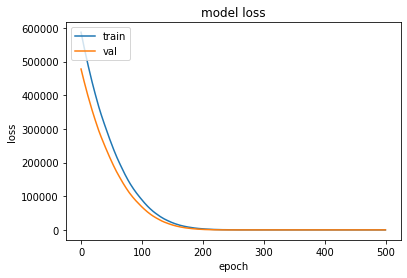

In [264]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Make a Prediction with the Neural Network

> - Can we make a prediction for for `Washington DC` accidents
> - With the already initialized Mathematical Equation?

In [253]:
X = df.drop(columns='total')
y = df.total

In [254]:
AL = X[:1]

In [255]:
AL

,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
abbrev,,,,,,
AL,7.332,5.64,18.048,15.04,784.55,145.08


In [256]:
model.predict(AL)

array([[0.]], dtype=float32)

In [257]:
model.get_weights()

[array([[-0.00470084, -0.31133795, -0.5857754 ],
        [-0.44991815,  0.06277943,  0.42929566],
        [-0.58053666,  0.27017844,  0.68008864],
        [ 0.08229119, -0.5569217 ,  0.06303853],
        [-0.5103425 ,  0.04528171, -0.27955174],
        [ 0.16269958,  0.09554011,  0.55522823]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[0.2700621],
        [0.5750053],
        [0.6719738]], dtype=float32),
 array([0.], dtype=float32)]

### Predictions vs Reality

> 1. Calculate the Predicted Accidents and
> 2. Compare it with the Real Total Accidents

In [258]:
y_pred = model.predict(X)

In [259]:
dfres = df[['total']].copy()
dfres['pred_zeros'] = y_pred
dfres.head()

,total,pred_zeros
abbrev,,
AL,18.8,0.0
AK,18.1,0.0
AZ,18.6,0.0
AR,22.4,0.0
CA,12.0,0.0


In [196]:
mse = ((dfres.total - dfres.pred_zeros)**2).mean()
mse

nan

### Does it take different times to get the best accuracy? Why?

## The number of Neurons & Hidden Layers

https://towardsdatascience.com/beginners-ask-how-many-hidden-layers-neurons-to-use-in-artificial-neural-networks-51466afa0d3e

https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.87287&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

## How to improve the Neural Network?

> - The Neural Network is horrible because
> - We didn't move the randomly initialized weights
> - If we get to `fit()` the Neural Network,
> - It will probably improve

## How good is the Model now?

> 1. Calculate the predictions
> 2. Give the residuals

## Summary

- Mathematical Formula
- Weights / Kernel Initializer
- Loss Function
- Activation Function
- Optimizers

## What cannot you change arbitrarily of a Neural Network?

- Input Neurons
- Output Neurons
- Loss Functions
- Activation Functions

# Neural Network for Classification

## Load Another Data

In [8]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

NameError: name 'tf' is not defined

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Visualize One Image

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

> - Which type of clothing is this?

## What does the Model predicts for this Item

## Could we improve the Classification?

# Common Errors

## The `loss` Function Matters

## The `activation` Function Matters

## The Number of `epochs` Matters

## The `optimizer` Matters

## The `kernel_initializer` Matters